<a href="https://colab.research.google.com/github/nikhil-xyz/Unemployment-Analysis/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nikhil-xyz/Unemployment-Analysis.git

Cloning into 'Unemployment-Analysis'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 18.72 KiB | 6.24 MiB/s, done.


### Part 0: Reading the data

In [2]:
import pandas as pd
data = pd.read_csv('/content/Unemployment-Analysis/unemployment_analysis.csv')

In [3]:
data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.8 lacs,7.84 lacs,7.85 lacs,7.84 lacs,7.83 lacs,7.84 lacs,7.86 lacs,7.81 lacs,...,6.56 lacs,6.45 lacs,6.41 lacs,6.49 lacs,6.61 lacs,6.71 lacs,6.73 lacs,6.91 lacs,7.56 lacs,8.11 lacs
1,Afghanistan,AFG,10.65 lacs,10.82 lacs,10.72 lacs,10.73 lacs,11.18 lacs,10.96 lacs,10.78 lacs,10.8 lacs,...,11.34 lacs,11.19 lacs,11.14 lacs,11.13 lacs,11.16 lacs,11.18 lacs,11.15 lacs,11.22 lacs,11.71 lacs,13.28 lacs
2,Africa Western and Central,AFW,4.42 lacs,4.53 lacs,4.55 lacs,4.54 lacs,4.53 lacs,4.57 lacs,4.6 lacs,4.66 lacs,...,4.64 lacs,4.41 lacs,4.69 lacs,4.63 lacs,5.57 lacs,6.02 lacs,6.04 lacs,6.06 lacs,6.77 lacs,6.84 lacs
3,Angola,AGO,4.21 lacs,4.21 lacs,4.23 lacs,4.16 lacs,4.11 lacs,4.1 lacs,4.09 lacs,4.07 lacs,...,7.35 lacs,7.37 lacs,7.37 lacs,7.39 lacs,7.41 lacs,7.41 lacs,7.42 lacs,7.42 lacs,8.33 lacs,8.53 lacs
4,Albania,ALB,10.31 lacs,30.01 lacs,25.26 lacs,20.84 lacs,14.61 lacs,13.93 lacs,16.88 lacs,20.05 lacs,...,13.38 lacs,15.87 lacs,18.05 lacs,17.19 lacs,15.42 lacs,13.62 lacs,12.3 lacs,11.47 lacs,13.33 lacs,11.82 lacs


In [4]:
data.shape

(235, 33)

In [5]:
data.columns

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [6]:
# removing strings from entries (part 0, task 1)
data = data.replace('lacs', '', regex=True)
data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.8,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.8,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.6,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.1,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.3,11.47,13.33,11.82


In [7]:
data1 = data.iloc[:, 2:].astype(float)

In [8]:
data2 = data.iloc[:,:2]

In [9]:
data = pd.concat([data2, data1], axis=1, join='inner')

In [10]:
# datatypes of columns (part 0, task 2)
data.dtypes

Country Name     object
Country Code     object
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

In [11]:
# Unique Country Names and Codes (part 0, task 3)
data[['Country Name', 'Country Code']].drop_duplicates()

,Country Name,Country Code
0,Africa Eastern and Southern,AFE
1,Afghanistan,AFG
2,Africa Western and Central,AFW
3,Angola,AGO
4,Albania,ALB
...,...,...
230,Samoa,WSM
231,"Yemen, Rep.",YEM
232,South Africa,ZAF
233,Zambia,ZMB


In [12]:
# Total Unemployed (part 0, task 4)
score = data.iloc[0:,2:].sum(axis=1)
unemployed = pd.concat([data['Country Name'], score], axis=1)
unemployed.rename(columns = {0:'Total Unemployed'}, inplace=True)
unemployed

,Country Name,Total Unemployed
0,Africa Eastern and Southern,224.57
1,Afghanistan,345.38
2,Africa Western and Central,153.27
3,Angola,169.02
4,Albania,505.86
...,...,...
230,Samoa,180.98
231,"Yemen, Rep.",365.60
232,South Africa,875.21
233,Zambia,407.96


### Part 1: Data Cleaning

In [13]:
def data_cleaning(data):
  # task 1: checking for the null value
  # Find for any missing value in all the columns, display them.
  # If any missing value exists, then replace them with the average of the corresponding country. Then, again, check for null values.

  data.isnull().sum()

  # task 2: removing outliers
  # For the countries ‘Benin’, ‘Bahrain’, find if any outliers exist. If yes, replace them with mean/median/mode.
  # IQR technique
  # For Benin
  q_data = data[data['Country Name'] == 'Benin'].iloc[:,2:].transpose()
  q_data = q_data.reset_index()
  q_data.columns = ['index', 'score']
  index_data = q_data['index']
  q_data = q_data.drop(columns = ['index'])
  q1 = q_data.quantile(0.25).values[0]
  q2 = q_data.quantile(0.75).values[0]
  iqr = q2 - q1
  lower_limit = q1 - iqr
  upper_limit = q2 + 8*iqr
  q_data = q_data[(q_data > lower_limit) & (q_data < upper_limit)]
  na = round(q_data.mean()[0], 2)
  q_data = q_data.fillna(na)
  index_data = list(index_data)
  q_data = list(q_data['score'])
  index = data[data['Country Name'] == 'Benin'].index[0]
  data.loc[index, index_data] = q_data

  # For Bahrain
  q_data = data[data['Country Name'] == 'Bahrain'].iloc[:,2:].transpose()
  q_data = q_data.reset_index()
  q_data.columns = ['index', 'score']
  index_data = q_data['index']
  q_data = q_data.drop(columns = ['index'])
  q1 = q_data.quantile(0.25).values[0]
  q2 = q_data.quantile(0.75).values[0]
  iqr = q2 - q1
  lower_limit = q1 - iqr
  upper_limit = q2 + 8*iqr
  q_data = q_data[(q_data > lower_limit) & (q_data < upper_limit)]
  na = round(q_data.mean()[0], 2)
  q_data = q_data.fillna(na)
  index_data = list(index_data)
  q_data = list(q_data['score'])
  index = data[data['Country Name'] == 'Bahrain'].index[0]
  data.loc[index, index_data] = q_data

  
  # task 3: Reshaping and Renaming
  # Create a new column, named, “Year”, which would have all the years as per each country & beside that column, add a new one named, “No. of unemployed”, which would have the corresponding total values.
  df = data.iloc[:,1:]
  # task 4
  # Change the column name “Country Name” to “Country_name” & “Country Code” to “Country_code”.
  # Finally, this is how our data, after the changes, should look like: (this is only for reference)
  # [Let’s call it df_pivot]

  # reversing the pivot table
  df = pd.melt(df, 
            id_vars='Country Code', 
            value_vars=list(df.columns[1:]), # list of years
            var_name='Year', 
            value_name='No. of unemployed')
  df_pivot = data.merge(df, on='Country Code')[['Country Name', 'Country Code', 'Year', 'No. of unemployed']]
  df_pivot.rename(columns = {'Country Name':'Country_name', 'Country Code':'Country_code'}, inplace=True)

  return df_pivot

In [14]:
df_pivot = data_cleaning(data)

In [15]:
data[data['Country Name'] == 'Benin'].values

array([['Benin', 'BEN', 1.49, 1.51, 1.41, 1.36, 1.25, 1.18, 1.1, 1.02,
        0.94, 0.85, 0.77, 0.69, 0.74, 0.77, 1.36, 0.86, 0.89, 0.94, 1.0,
        1.04, 2.65, 2.47, 2.29, 2.13, 2.01, 1.83, 1.64, 1.47, 1.47, 1.58,
        1.57]], dtype=object)

In [16]:
data[data['Country Name'] == 'Bahrain'].values

array([['Bahrain', 'BHR', 1.01, 1.05, 1.01, 1.11, 1.08, 1.08, 1.09, 1.08,
        1.09, 1.08, 1.17, 1.11, 1.09, 1.09, 1.09, 1.17, 1.09, 1.11, 1.14,
        1.13, 1.18, 1.2, 1.18, 1.19, 1.2, 1.19, 1.18, 1.2, 1.2, 1.78,
        1.87]], dtype=object)

In [17]:
df_pivot

,Country_name,Country_code,Year,No. of unemployed
0,Africa Eastern and Southern,AFE,1991,7.80
1,Africa Eastern and Southern,AFE,1992,7.84
2,Africa Eastern and Southern,AFE,1993,7.85
3,Africa Eastern and Southern,AFE,1994,7.84
4,Africa Eastern and Southern,AFE,1995,7.83
...,...,...,...,...
7280,Zimbabwe,ZWE,2017,4.78
7281,Zimbabwe,ZWE,2018,4.80
7282,Zimbabwe,ZWE,2019,4.83
7283,Zimbabwe,ZWE,2020,5.35


### Part 2: Descriptive statistics


In [18]:
def descriptive_stats(country_code):
  # task 1
  # Give the mean, median, mode & standard deviation for the parametrized country over all the years. [e.g., descriptive_stats(‘WSM’) would give the descriptive statistics of this country.]
  # mean, median, mode, standard deviation
  mean = df_pivot[df_pivot['Country_code']==country_code]['No. of unemployed'].mean()
  median = df_pivot[df_pivot['Country_code']==country_code]['No. of unemployed'].median()
  mode = df_pivot[df_pivot['Country_code']==country_code]['No. of unemployed'].mode()
  standard_deviation = df_pivot[df_pivot['Country_code']==country_code]['No. of unemployed'].std()
  print("Mean: ", mean)
  print("Median", median)
  print("Mode", mode)
  print("Standard Deviation", standard_deviation)

  # task 2
  # Give the year during which the country’s (of the passed country_code) unemployment was minimum & maximum.
  # minimum employment year
  idx_min = df_pivot[df_pivot['Country_code']==country_code]['No. of unemployed'].idxmin()
  min_yr = df_pivot.loc[idx_min]['Year']

  idx_max = df_pivot[df_pivot['Country_code']==country_code]['No. of unemployed'].idxmax()
  max_yr = df_pivot.loc[idx_max]['Year']

  print("Minimum Unemployment Year", min_yr)
  print("Maximum Unemployment Year", max_yr)

In [19]:
descriptive_stats('IND')

Mean:  5.64483870967742
Median 5.58
Mode 0    5.74
Name: No. of unemployed, dtype: float64
Standard Deviation 0.46306134199651444
Minimum Unemployment Year 2019
Maximum Unemployment Year 2020


In [20]:
df_pivot[df_pivot['Country_code']=='IND']

,Country_name,Country_code,Year,No. of unemployed
2945,India,IND,1991,5.60
2946,India,IND,1992,5.73
2947,India,IND,1993,5.69
2948,India,IND,1994,5.74
2949,India,IND,1995,5.76
2950,India,IND,1996,5.74
2951,India,IND,1997,5.61
2952,India,IND,1998,5.67
2953,India,IND,1999,5.74
2954,India,IND,2000,5.56


In [21]:
# task 3
# Find the top 5 countries which had maximum unemployment in 2021.
# Top 5 countries where unemployment is high
top5_unemployment_countries = df_pivot[df_pivot['Year'] == '2021'].sort_values(by=['No. of unemployed'], ascending=False).head()[['Country_name','No. of unemployed']]
top5_unemployment_countries.reset_index()

,index,Country_name,No. of unemployed
0,7222,South Africa,33.56
1,1549,Djibouti,28.39
2,6199,Eswatini,25.76
3,5362,West Bank and Gaza,24.90
4,898,Botswana,24.72


In [22]:
# task 4
# Find the top 3 countries that had unemployment greater than 5 lacs in the year 2021.
# Top 3 countries that had unemployment greater than 5 lacs in the year 2021
countries = df_pivot[df_pivot['Year'] == '2021'].sort_values(by=['No. of unemployed'], ascending=False)[['Country_name','No. of unemployed']]
top3_unemployment_countries = countries[countries['No. of unemployed'] > 5].head(3)[['Country_name', 'No. of unemployed']]
top3_unemployment_countries.reset_index()

,index,Country_name,No. of unemployed
0,7222,South Africa,33.56
1,1549,Djibouti,28.39
2,6199,Eswatini,25.76


In [23]:
# task 5
# Calculate the change (in percentage) the countries (from ques. 3) saw in unemployment starting from 1991 to 2021 (year on year). [for e.g., change_1 = (1991_value – 1992_value.)/1991_value, change_2 = (1992_val – 1993_val)/1992_val & so on.]
# Growth Rate per Year for each country
df_pivot['Rate'] = 0
for country in df_pivot['Country_name'].unique():
  df_pivot['Rate'].update(df_pivot[df_pivot['Country_name'] == country]['No. of unemployed'].pct_change()*100)

In [24]:
df_pivot.head(40)

,Country_name,Country_code,Year,No. of unemployed,Rate
0,Africa Eastern and Southern,AFE,1991,7.80,0.000000
1,Africa Eastern and Southern,AFE,1992,7.84,0.512821
2,Africa Eastern and Southern,AFE,1993,7.85,0.127551
3,Africa Eastern and Southern,AFE,1994,7.84,-0.127389
4,Africa Eastern and Southern,AFE,1995,7.83,-0.127551
5,Africa Eastern and Southern,AFE,1996,7.84,0.127714
6,Africa Eastern and Southern,AFE,1997,7.86,0.255102
7,Africa Eastern and Southern,AFE,1998,7.81,-0.636132
8,Africa Eastern and Southern,AFE,1999,7.79,-0.256082
9,Africa Eastern and Southern,AFE,2000,7.72,-0.898588


### Part 3: Prescriptive statistics

In [25]:
# task 1
# After getting statistics for a country over all years, can you tell in which year the country having country_code ‘BGR’ had the minimum unemployment issue?
min_bgr_index = df_pivot[df_pivot['Country_code'] == 'BGR']['No. of unemployed'].idxmin()
df_pivot.loc[min_bgr_index]['Year']

'2019'

In [26]:
df_pivot[df_pivot['Country_code'] == 'BGR'][['No. of unemployed', 'Year']]

,No. of unemployed,Year
527,11.10,1991
528,15.30,1992
529,16.40,1993
530,12.80,1994
531,11.10,1995
532,12.50,1996
533,13.70,1997
534,12.20,1998
535,14.10,1999
536,16.22,2000


In [27]:
# task 2
# Create a new dataframe which would give us the country names along with their corresponding country codes. We would also have a new column along each country which would give us the increase or decrease percentage in unemployment that each country saw from 1991 to 2021.
new_df = df_pivot[['Country_name', 'Country_code', 'Year', 'Rate']]
new_df

,Country_name,Country_code,Year,Rate
0,Africa Eastern and Southern,AFE,1991,0.000000
1,Africa Eastern and Southern,AFE,1992,0.512821
2,Africa Eastern and Southern,AFE,1993,0.127551
3,Africa Eastern and Southern,AFE,1994,-0.127389
4,Africa Eastern and Southern,AFE,1995,-0.127551
...,...,...,...,...
7280,Zimbabwe,ZWE,2017,-0.208768
7281,Zimbabwe,ZWE,2018,0.418410
7282,Zimbabwe,ZWE,2019,0.625000
7283,Zimbabwe,ZWE,2020,10.766046


In [28]:
# task 3
# Can you compare between the minimum unemployment seen over all years for the country ‘Japan’, with the value seen in the previous & next 1 year of that year? Write a brief note on the same.
Japan_min = df_pivot[df_pivot['Country_name'] == 'Japan']['No. of unemployed'].idxmin()
current = df_pivot.loc[Japan_min]
next = df_pivot.loc[Japan_min+1]
current, next

(Country_name         Japan
 Country_code           JPN
 Year                  1991
 No. of unemployed      2.1
 Rate                   0.0
 Name: 3224, dtype: object, Country_name            Japan
 Country_code              JPN
 Year                     1992
 No. of unemployed         2.2
 Rate                 4.761905
 Name: 3225, dtype: object)

Japan had the lowest unemployment in the year 1991 with a total of 2.1 lacks unemployed. In the preceding year, it witnesses a spike of 4%. Since we don't have data available before 1991, we can't make any claim regarding it.

In [29]:
df_pivot[df_pivot['Country_name'] == 'Japan']

,Country_name,Country_code,Year,No. of unemployed,Rate
3224,Japan,JPN,1991,2.10,0.000000
3225,Japan,JPN,1992,2.20,4.761905
3226,Japan,JPN,1993,2.50,13.636364
3227,Japan,JPN,1994,2.90,16.000000
3228,Japan,JPN,1995,3.20,10.344828
3229,Japan,JPN,1996,3.40,6.250000
3230,Japan,JPN,1997,3.40,0.000000
3231,Japan,JPN,1998,4.10,20.588235
3232,Japan,JPN,1999,4.70,14.634146
3233,Japan,JPN,2000,4.75,1.063830


In [30]:
# task 4
# Among ‘MDA’, ‘NAC’, ‘PAN’, ‘PAK’, ‘UGA’ which countries saw a huge jump in the unemployment numbers from 2019 to 2021, in both upward & downward direction separately?
df_19_21 = df_pivot[df_pivot['Year'].between('2019', '2021')]
df_hold = df_19_21[(df_19_21['Country_code'] == 'MDA') | (df_19_21['Country_code'] == 'NAC') | (df_19_21['Country_code'] == 'PAN') | (df_19_21['Country_code'] == 'PAK') | (df_19_21['Country_code'] == 'UGA')]
df_hold

,Country_name,Country_code,Year,No. of unemployed,Rate
4058,Moldova,MDA,2019,5.10,24.087591
4059,Moldova,MDA,2020,3.82,-25.098039
4060,Moldova,MDA,2021,3.96,3.664921
4616,North America,NAC,2019,3.89,-5.352798
4617,North America,NAC,2020,8.21,111.053985
4618,North America,NAC,2021,5.70,-30.572473
5019,Pakistan,PAK,2019,3.54,-13.235294
5020,Pakistan,PAK,2020,4.30,21.468927
5021,Pakistan,PAK,2021,4.35,1.162791
5050,Panama,PAN,2019,4.73,23.498695


In [31]:
# dropping rows of the year 2020

df_hold = df_hold[df_hold['Year'] != '2020'][['Country_name', 'Country_code', 'No. of unemployed']]
df_hold['Rate'] = 0
for code in df_hold['Country_code'].unique():
  df_hold['Rate'].update(df_hold[df_hold['Country_code'] == code]['No. of unemployed'].pct_change()*100) 

In [32]:
df_hold = df_hold[df_hold['Rate'] != 0.0]
df_hold

,Country_name,Country_code,No. of unemployed,Rate
4060,Moldova,MDA,3.96,-22.352941
4618,North America,NAC,5.70,46.529563
5021,Pakistan,PAK,4.35,22.881356
5052,Panama,PAN,12.09,155.602537
6788,Uganda,UGA,2.94,53.125000


In [33]:
# Country with maximum and minimum rate of unemployment
print("Country with minimum unemployment rate")
print(df_hold.loc[df_hold['Rate'].idxmin()][['Country_name', 'No. of unemployed', 'Rate']])
print("\nCountry with maximum unemployment rate")
print(df_hold.loc[df_hold['Rate'].idxmax()][['Country_name', 'No. of unemployed', 'Rate']])

Country with minimum unemployment rate
Country_name           Moldova
No. of unemployed         3.96
Rate                -22.352941
Name: 4060, dtype: object

Country with maximum unemployment rate
Country_name             Panama
No. of unemployed         12.09
Rate                 155.602537
Name: 5052, dtype: object


Panama witnessed the highest unemployment growth to 155% within 3 years with 12 lack unemployed. 
Moldova witnessed the biggest fall in the unemployment rate to 22% with approximately 4 lack unemployed among 5 countries.

In [34]:
# task 5
# What would you say about the change in percentage seen from 1991 to 2021 for the country ‘LSO’? Was it a predictable upward/downward movement? [ To see that, you may have to plot the numbers for all the years for ‘LSO’.]
df_19_21[df_19_21['Country_code'] == 'LSO']

,Country_name,Country_code,Year,No. of unemployed,Rate
3841,Lesotho,LSO,2019,22.44,-1.622096
3842,Lesotho,LSO,2020,24.56,9.447415
3843,Lesotho,LSO,2021,24.60,0.162866


In [35]:
lso_df = df_pivot[df_pivot['Country_code'] == 'LSO']
lso_df

,Country_name,Country_code,Year,No. of unemployed,Rate
3813,Lesotho,LSO,1991,36.12,0.000000
3814,Lesotho,LSO,1992,36.39,0.747508
3815,Lesotho,LSO,1993,36.74,0.961803
3816,Lesotho,LSO,1994,36.98,0.653239
3817,Lesotho,LSO,1995,37.34,0.973499
3818,Lesotho,LSO,1996,37.59,0.669523
3819,Lesotho,LSO,1997,37.94,0.931099
3820,Lesotho,LSO,1998,37.16,-2.055878
3821,Lesotho,LSO,1999,36.35,-2.179763
3822,Lesotho,LSO,2000,35.46,-2.448418


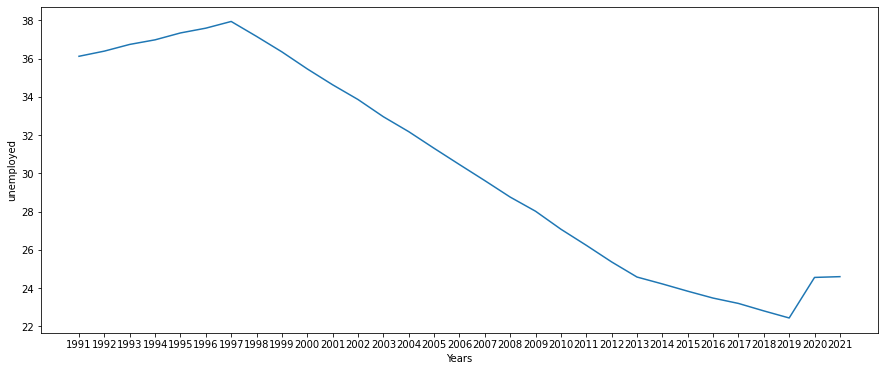

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(lso_df['Year'], lso_df['No. of unemployed'])
plt.xlabel('Years')
plt.ylabel('unemployed')
plt.show()

The unemployment rate of Lesotho was falling since 1991 with an avarage rate of 1.5%-2%. The sudden spike of 9% in the year 2020 looks unusual.

### Part 4: Simple Machine learning questions

In [37]:
# string to date format
df_pivot['Year'] = pd.to_datetime(df_pivot['Year'], format='%Y')

In [38]:
# # task 1
# Predict the next 2 years’ values for all the countries. [i.e., for 2022 & 2023]
# [Use 2 models – Moving Average (take 3 months – for e.g., for 2005 = avg of (2002, 2003, 2004)) & ARIMA – for forecasting. Also, compare the MAPE of the 2 models.]

# with ARIMA
import statsmodels.api as sm
import numpy as np
def predict_future_arima(future_yrs, df_pivot):
  # ARIMA model
  df_arima_final = pd.DataFrame()

  for country in df_pivot['Country_name'].unique():
    df_arima = df_pivot[df_pivot['Country_name'] == country][['Year', 'No. of unemployed']]
    df_arima.set_index('Year', inplace=True)
    model = sm.tsa.arima.ARIMA(df_arima, order=(3,0,0))
    model_fit = model.fit()
    predictions = model_fit.forecast(future_yrs)
    
    predictions = predictions.reset_index()
    predictions.columns = ['Year', 'No. of unemployed'] 

    #appending current countries data to df_arima_final
    df_current = df_pivot[df_pivot['Country_name'] == country][['Country_name', 'Country_code', 'Year', 'No. of unemployed']]
    df_arima_final = df_arima_final.append(df_current, ignore_index=True)
    
    #appending predicted data to df_arima_final
    for i in range(len(predictions)):
      yr = predictions['Year'].loc[i]
      num = predictions['No. of unemployed'].loc[i]
      code = df_pivot[df_pivot['Country_name'] == country]['Country_code'].unique()[0]
      df = {'Country_name':country, 'Country_code':code, 'Year':yr, 'No. of unemployed':num}
      df_arima_final = df_arima_final.append(df, ignore_index=True)
  return df_arima_final

In [39]:
arima_df = predict_future_arima(2, df_pivot)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
<ipython-input-38-ec5d62d7b0a2>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_arima_final = df_arima_final.append(df_current, ignore_index=True)
<ipython-input-38-ec5d62d7b0a2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

In [40]:
# task 2
# Plot a line graph that would have the actual values we have in the dataset along with the forecasted values.
# plotting the graph
def plot_graph(country, arima_df):
  country_df = arima_df[arima_df['Country_name'] == country]
  original = country_df.iloc[:32][['Year', 'No. of unemployed']]
  predicted = country_df.iloc[31:][['Year', 'No. of unemployed']]
  original.set_index('Year', inplace=True)
  predicted.set_index('Year', inplace=True)

  original['No. of unemployed'].plot(figsize=(15,8), fontsize=11, label='original') 
  predicted['No. of unemployed'].plot(figsize=(15,8), fontsize=11, label='forecasted') 
  plt.xlabel("Years") 
  plt.ylabel("Unemployment (In lacks)") 
  plt.legend(loc='best') 
  plt.show()

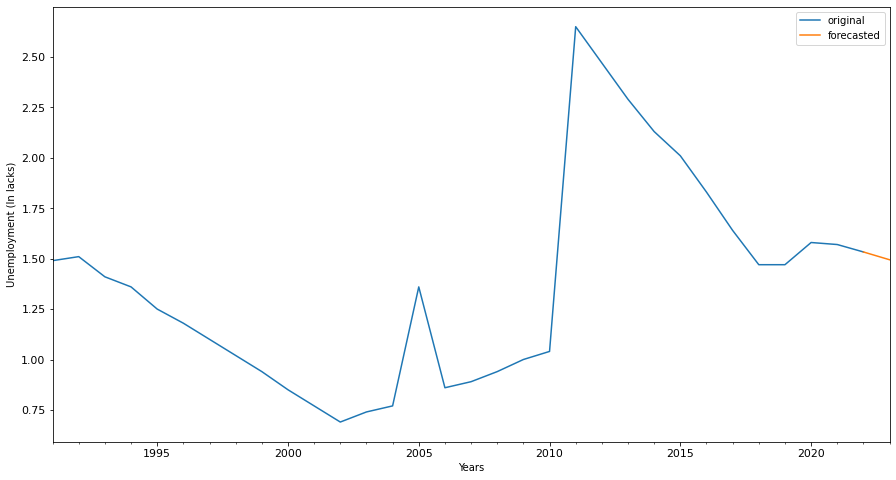

In [41]:
# send parameters as country name and arima_df
plot_graph('Benin', arima_df)

In [42]:
# task 3
# For each year out of the 2 years (2022, 2023), find the maximum & minimum number of unemployed for each country.
def max_min(country, arima_df):
  country_df = arima_df[arima_df['Country_name'] == country]
  country_df = country_df[(country_df['Year'] == '2022-01-01') | (country_df['Year'] == '2023-01-01')] 
  print("Maximum Unemployment Year is: ", str(country_df.loc[country_df['No. of unemployed'].idxmax()]['Year'])[:4])
  print("Minimum Unemployment Year is: ", str(country_df.loc[country_df['No. of unemployed'].idxmin()]['Year'])[:4])

In [43]:
# write the country name
max_min('India', arima_df)

Maximum Unemployment Year is:  2023
Minimum Unemployment Year is:  2022


In [44]:
# task 4
# Find which forecasted year has the maximum overall unemployment.
for_2022 = arima_df[arima_df['Year'] == '2022-01-01']['No. of unemployed'].mean()
for_2023 = arima_df[arima_df['Year'] == '2023-01-01']['No. of unemployed'].mean()
print(for_2022, for_2023)
if (for_2022 > for_2023):
  print("Unemployment is more in the year 2022")
else:
  print("Unemployment is more in the year 2023")

8.34220402304567 8.33718863731572
Unemployment is more in the year 2022


In [45]:
# task 5
# Find which countries’ unemployment in 2022 [which you’ll be forecasting] increased in comparison to 2021.
print("Countries with increased unemployment during 2021-22:\n")
for country in arima_df['Country_name'].unique():
  df_temp = arima_df[arima_df['Country_name'] == country]
  df_2021 = df_temp[df_temp['Year'] == '2021-01-01']['No. of unemployed'].values[0]
  df_2022 = df_temp[df_temp['Year'] == '2022-01-01']['No. of unemployed'].values[0]
 
  if (df_2022 > df_2021):
    print(country)

Countries with increased unemployment during 2021-22:

Africa Eastern and Southern
Afghanistan
Africa Western and Central
Albania
Arab World
Argentina
Azerbaijan
Burundi
Belgium
Bulgaria
Bahrain
Bahamas, The
Bosnia and Herzegovina
Belarus
Belize
Barbados
Bhutan
Central Europe and the Baltics
Chile
Cote d'Ivoire
Cameroon
Congo, Dem. Rep.
Congo, Rep.
Comoros
Costa Rica
Caribbean small states
Cuba
Czech Republic
Djibouti
Denmark
Algeria
Early-demographic dividend
Europe & Central Asia
Egypt, Arab Rep.
Euro area
Eritrea
Spain
Estonia
Ethiopia
European Union
Fragile and conflict affected situations
Finland
Fiji
France
Gabon
United Kingdom
Georgia
Ghana
Guinea
Guam
Guyana
High income
Croatia
Haiti
Hungary
IDA total
IDA blend
Indonesia
IDA only
Ireland
Israel
Italy
Jamaica
Kazakhstan
Lao PDR
Lebanon
Libya
St. Lucia
Sri Lanka
Lower middle income
Lesotho
Lithuania
Luxembourg
Latvia
Macao SAR, China
Morocco
Moldova
Maldives
Middle East & North Africa
North Macedonia
Malta
Middle East & North Afr

# **Part 5: Visualization**

In [46]:
# task 1
# A bar graph plotting the top 10 countries’ in unemployment in the year 2021.
top_10_countries = arima_df[arima_df['Year'] == '2021-01-01'].sort_values(by=['No. of unemployed'], ascending=False).head(10)

In [47]:
top_10_countries

,Country_name,Country_code,Year,No. of unemployed
7686,South Africa,ZAF,2021-01-01,33.56
1647,Djibouti,DJI,2021-01-01,28.39
6597,Eswatini,SWZ,2021-01-01,25.76
5706,West Bank and Gaza,PSE,2021-01-01,24.90
954,Botswana,BWA,2021-01-01,24.72
4089,Lesotho,LSO,2021-01-01,24.60
1317,"Congo, Rep.",COG,2021-01-01,23.01
2340,Gabon,GAB,2021-01-01,22.26
4947,Namibia,NAM,2021-01-01,21.68
7422,St. Vincent and the Grenadines,VCT,2021-01-01,21.62


[]

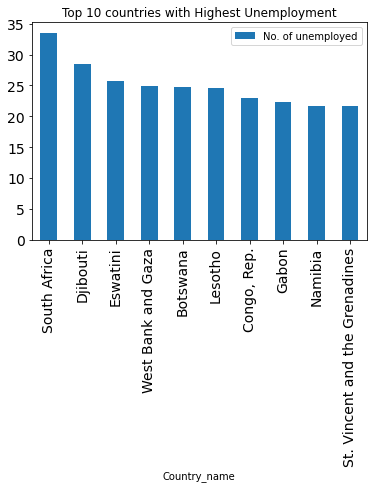

In [48]:
top_10_countries.plot.bar(x='Country_name', y='No. of unemployed', title='Top 10 countries with Highest Unemployment', rot=90, fontsize=14)
plt.plot()

In [49]:
# task 2
# A line graph showing the percentage change in unemployment from 2000 to 2019 (year on year) for the top 5 countries that had maximum unemployment in 2021.

top5_countries = top_10_countries[:5]['Country_name'].reset_index().drop(['index'], axis=1)
top5_countries

,Country_name
0,South Africa
1,Djibouti
2,Eswatini
3,West Bank and Gaza
4,Botswana


In [50]:
top5_df = pd.DataFrame()
for country in top5_countries['Country_name']:
  top5_df = top5_df.append(df_pivot[df_pivot['Country_name'] == country])
  top5_df = top5_df[(top5_df['Year'] >= '2000-01-01') & (top5_df['Year'] < '2020-01-01')]

<ipython-input-50-abbcea8c9e00>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top5_df = top5_df.append(df_pivot[df_pivot['Country_name'] == country])
<ipython-input-50-abbcea8c9e00>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top5_df = top5_df.append(df_pivot[df_pivot['Country_name'] == country])
<ipython-input-50-abbcea8c9e00>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top5_df = top5_df.append(df_pivot[df_pivot['Country_name'] == country])
<ipython-input-50-abbcea8c9e00>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top5_df = top5_df.append(df_pivot[df_pivot['Country_name'] == country])
<ipython-input-50-abbcea8c9e00>:

In [51]:
top5_df.drop(['Country_code', 'No. of unemployed'], axis=1, inplace=True)

In [52]:
top5_df = top5_df.reset_index().drop(['index'], axis=1)
top5_df

,Country_name,Year,Rate
0,South Africa,2000-01-01,-0.100301
1,South Africa,2001-01-01,2.710843
2,South Africa,2002-01-01,8.471815
3,South Africa,2003-01-01,-2.943827
4,South Africa,2004-01-01,-8.851749
...,...,...,...
95,Botswana,2015-01-01,2.901451
96,Botswana,2016-01-01,2.236266
97,Botswana,2017-01-01,2.567760
98,Botswana,2018-01-01,2.318034


In [53]:
# generating pivot table
top5_df = top5_df.pivot(index='Year', columns='Country_name', values='Rate')
top5_df

Country_name,Botswana,Djibouti,Eswatini,South Africa,West Bank and Gaza
Year,,,,,
2000-01-01,-13.176599,-0.316567,2.494715,-0.100301,-0.093985
2001-01-01,16.750630,-0.423430,2.433993,2.710843,102.163688
2002-01-01,13.969795,-0.496102,2.134515,8.471815,27.780363
2003-01-01,12.636062,-0.427350,2.287066,-2.943827,-16.241806
2004-01-01,-8.277311,-0.393419,2.235929,-8.851749,0.913043
2005-01-01,-9.253321,-0.466786,2.073906,-1.120543,-13.744076
2006-01-01,-10.247350,-0.541126,2.105652,-2.678571,-5.044955
2007-01-01,-3.262092,-0.471527,2.170767,-6.351447,-3.840084
2008-01-01,-3.255814,-0.473761,-1.983003,-15.561417,25.328228


[]

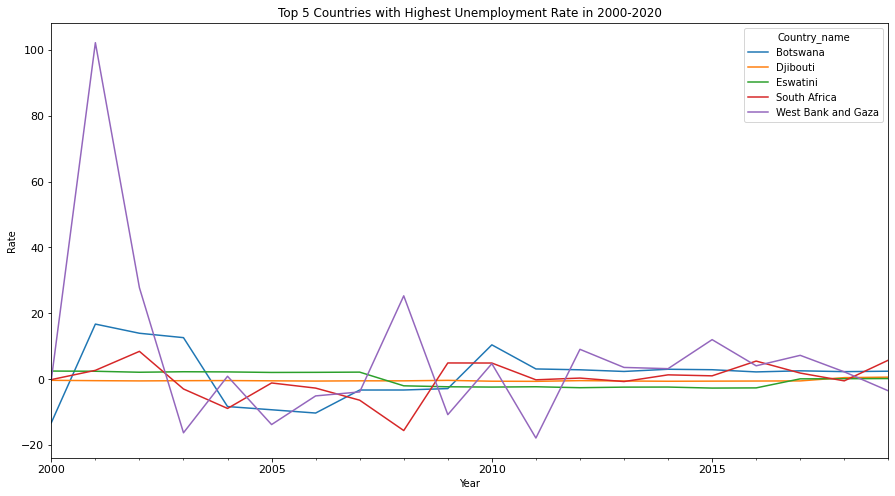

In [54]:
top5_df.plot(figsize=(15,8), fontsize=11, title='Top 5 Countries with Highest Unemployment Rate in 2000-2020')
plt.ylabel('Rate')
plt.plot()


<ipython-input-55-4caefa5b832d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top3_df = top3_df.append(df_pivot[df_pivot['Country_name'] == country])
<ipython-input-55-4caefa5b832d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top3_df = top3_df.append(df_pivot[df_pivot['Country_name'] == country])
<ipython-input-55-4caefa5b832d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top3_df = top3_df.append(df_pivot[df_pivot['Country_name'] == country])


[]

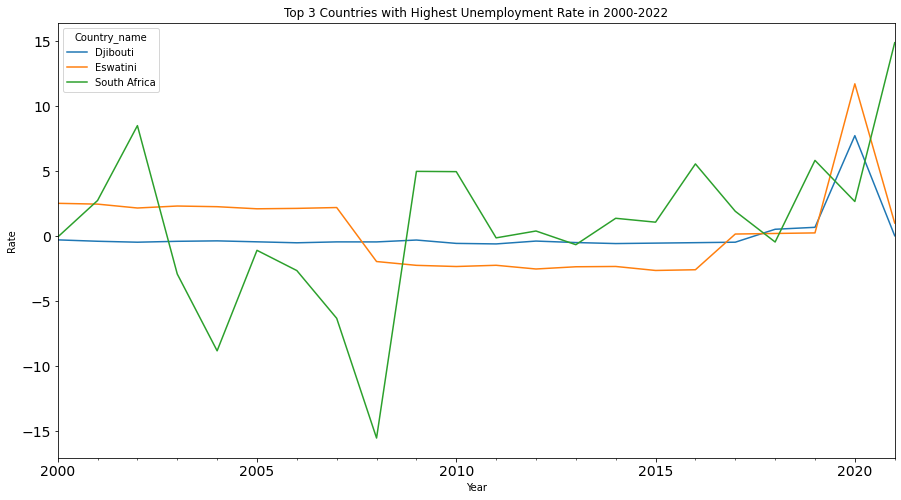

In [55]:
# task 3
# A bar graph that would plot the top 3 countries in unemployment in 2021 along with their forecast in 2022.
top3_countries = top_10_countries[:3]['Country_name'].reset_index().drop(['index'], axis=1)
top3_df = pd.DataFrame()
for country in top3_countries['Country_name']:
  top3_df = top3_df.append(df_pivot[df_pivot['Country_name'] == country])
  top3_df = top3_df[(top3_df['Year'] >= '2000-01-01') & (top3_df['Year'] < '2023-01-01')]
top3_df.drop(['Country_code', 'No. of unemployed'], axis=1, inplace=True)
top3_df = top3_df.reset_index().drop(['index'], axis=1)
top3_df = top3_df.pivot(index='Year', columns='Country_name', values='Rate')
top3_df.plot(figsize=(15,8), fontsize=14, title='Top 3 Countries with Highest Unemployment Rate in 2000-2022')
plt.ylabel('Rate')
plt.plot()


[]

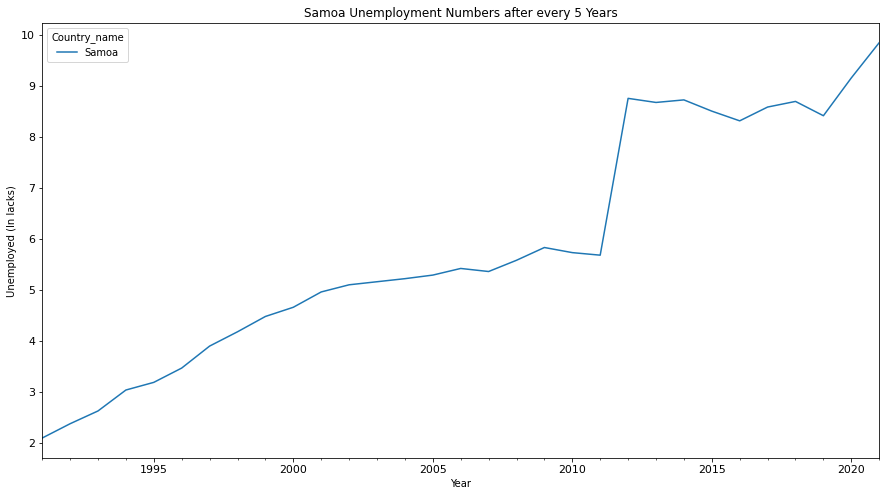

In [56]:
# task 4
# For the country code ‘WSM’, plot a line graph that would show us how the unemployment changed every 5 years. (like in 1991, 1996, ….)
df_wsm = df_pivot[df_pivot['Country_code'] == 'WSM'][['Country_name', 'Year', 'No. of unemployed']]
df_wsm = df_wsm.reset_index().drop(['index'], axis=1)
df_wsm = df_wsm.pivot(index='Year', columns='Country_name', values='No. of unemployed')
df_wsm.plot(figsize=(15,8), fontsize=11, title='Samoa Unemployment Numbers after every 5 Years')
plt.ylabel('Unemployed (In lacks)')
plt.plot()

Part 6,7:
I worked on a personal project on data analysis where I analyze the 'Turkey-Syria Earthquake Tweets' dataset available on Kaggle. The project is deployed at URL https://huggingface.co/spaces/nikhil567/Turkey-Syria-Earthquake
Also, I have deployed some Natural Language Processing projects. All the deployment links are in my resume.

I am a 2020 batch passed-out and currently working on personal projects waiting for real-time projects. bold text